<a href="https://colab.research.google.com/github/medhanie/datascience-dviz/blob/develop/geodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

In [2]:
import geopandas as gpd

In [3]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


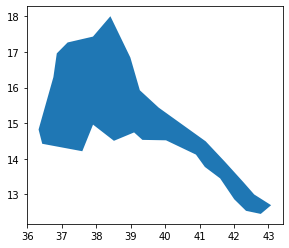

In [5]:
eritrea = world.loc[world['name'] == 'Eritrea']
boundaries = eritrea['geometry']
eritrea.plot()

In [ ]:
pip install datapackage

In [16]:
import datapackage
import pandas as pd

df = gpd.read_file('/content/drive/MyDrive/datascience/countries.geojson')

df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [20]:
eritrea = df.loc[df['ADMIN'] == 'Eritrea']
print(eritrea)

      ADMIN ISO_A3                                           geometry
69  Eritrea    ERI  MULTIPOLYGON (((40.02622 15.88264, 40.06267 15...


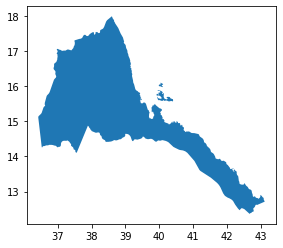

In [ ]:
boundaries = eritrea['geometry']
eritrea.plot()

In [24]:
df.shape

(255, 3)

In [ ]:
pip install seaborn

max age is 90
min age is 17


Text(0.5, 1.0, 'Income By Age Group')

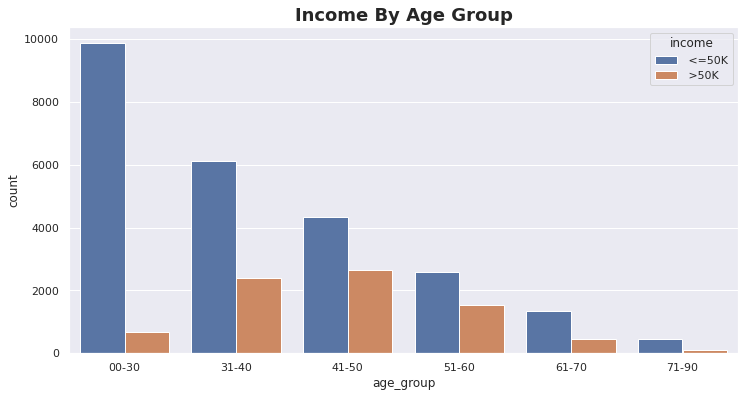

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", \
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", \
           "hours-per-week", "native-country", "income"]

incomes = pd.read_csv('/content/drive/MyDrive/datascience/adult.data', names = headers)


max_age = incomes['age'].max()
print('max age is {}'.format(max_age))
min_age = incomes['age'].min()
print('min age is {}'.format(min_age))

def group_by_age(x):
  if( x >= min_age and x <= 30 ):
    return "00-30"
  if(x >= 31 and x <= 40):
    return "31-40"
  if( x >= 41 and x <= 50 ):
    return "41-50"
  if( x >= 51 and x <= 60 ):
    return "51-60"
  if( x >= 61 and x <= 70 ):
    return "61-70"
  else:
    return "71-" + str(max_age)


incomes['age_group'] = incomes['age'].apply(group_by_age)

plt.figure(figsize = (12,6))

order_list = sorted(incomes['age_group'].unique())

sns.countplot(x = incomes['age_group'], hue = incomes['income'], order = order_list)

plt.title('Income By Age Group', fontsize=18, fontweight='bold')



# New Section